In [1]:
import os
os.chdir('/Users/jonas/Desktop/Books/Think Stats 2 - Allen B Downey/ThinkStats2-master/code')

In [2]:
from __future__ import print_function, division

import numpy as np

import brfss

import thinkstats2
import thinkplot

In [3]:
# Root mean squared error is one of several ways to summarize the average error of an estimation process.

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [4]:
# The following function simulates experiments where we try to estimate the mean of a population based on a sample with size n=7. We run iters=1000 experiments and collect the mean and median of each sample.

import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.37957197128247544
rmse median 0.47113253237346125


In [5]:
# Using x to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE. But using the median is more robust in the presence of outliers or large errors.

# Estimating variance
# The obvious way to estimate the variance of a population is to compute the variance of the sample,  S squared, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

# The following function computes the mean error for a collection of estimates.

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [6]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.12941735337568339
mean error unbiased 0.015679754395036046


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [7]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

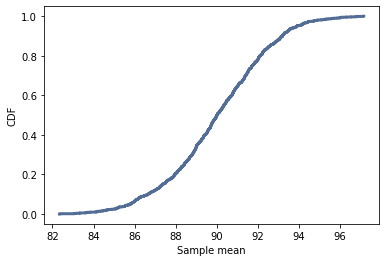

In [8]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

In [10]:
# The mean of the sample means is close to the actual value of μ

np.mean(xbars)

90.0091094680171

In [11]:
# An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [12]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.78407313759566, 93.89627984981435)

In [14]:
# And the RMSE of the sample means is called the standard error.

stderr = RMSE(xbars, 90)
stderr

2.493317367190157

In [15]:
# Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

In [16]:
# The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample.

In [17]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.1938797931671377
rmse Lm 1.9753673885602059
mean error L 0.4029382425107546
mean error Lm 0.5293380833766658


In [18]:
# The RMSE is smaller for the sample mean than for the sample median.

# But neither estimator is unbiased.